In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
import copy
import torch.nn as nn
import torch.nn.functional as F
import os

from model import *

## Parameters

In [2]:
batch_size_train = 10
batch_size_test = 100

train_loader, test_loader = define_mnist_loaders(batch_size_train, batch_size_test)

input_size = 784
encoding_dim = 32
learning_rate = 0.01
momentum = 0.5
log_interval = 10
n_epochs = 1

0.4%

100.0%


Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw



102.8%
0.1%

Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw



100.0%


Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw


22.5%

112.7%

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw



Loaded image shape in tensor: torch.Size([10, 1, 28, 28])


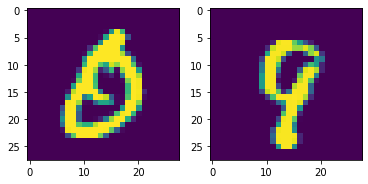

In [3]:
# get minibatch
x,target = next(iter(train_loader)); x_test,_ = next(iter(test_loader))
print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][1]);
axes[0].imshow(x[0][0].numpy()); axes[1].imshow(x_test[0][0].detach().numpy());

In [4]:
autoencoder = Autoencoder(784,32)

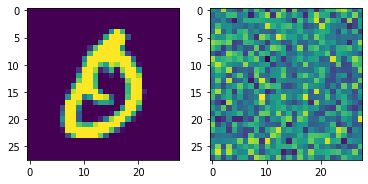

In [5]:
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][1]);
axes[0].imshow(x[0][0].numpy()); axes[1].imshow(autoencoder(x)[0][0].detach().numpy())

In [6]:
%time train(autoencoder, trainloader=train_loader, valloader=test_loader, num_epochs=n_epochs)

Epoch 1/1
----------
train loss -39.316076
valid loss -45.368548

Wall time: 44.1 s


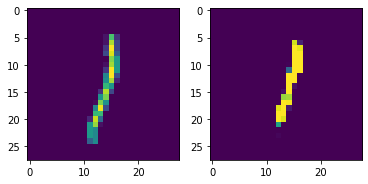

In [7]:
x,y = next(iter(train_loader))
#z = autoencoder(x)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
x = x.to(device)
fig,axes = plt.subplots(1,2); plt.set_cmap(['gray','viridis'][1])
axes[0].imshow(x[0][0].cpu()); axes[1].imshow(autoencoder(x)[0][0].detach().cpu())